<a href="https://colab.research.google.com/github/azkalltlhn/Diabetes-Classification-KNN-Algorithm/blob/main/Diabetes_Classification_KNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV Data
data = pd.read_csv("diabetes.csv")

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# number of row's and col in data set
row,col=data.shape
print("Number of Row's in Data :",row)
print("Number of Col's in Data :",col)

Number of Row's in Data : 768
Number of Col's in Data : 9


In [5]:
# Check for duplicates and remove them if found
if data.duplicated().sum() > 0:
    print("Found duplicate rows. Removing them...")
    data = data.drop_duplicates()
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [6]:
# Check for missing values
missing_values = data.isna().sum()
if missing_values.any():
    print(f"Missing values found in {missing_values.index.tolist()}. Consider imputation techniques.")
else:
    print("No missing values found.")

No missing values found.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
data["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [10]:
# Check the original class distribution
print("Original class distribution:")
print(data["Outcome"].value_counts())

Original class distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


In [11]:
# Downsample the majority class (Outcome = 0) to 250
class_0 = data[data["Outcome"] == 0].sample(250, random_state=42)

In [12]:
# Downsample the minority class (Outcome = 1) to 250
class_1 = data[data["Outcome"] == 1].sample(250, random_state=42)

In [13]:
# Concatenate the balanced classes
balanced_data = pd.concat([class_0, class_1])

In [14]:
# Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the balanced class distribution
print("\nBalanced class distribution:")
print(balanced_data["Outcome"].value_counts())


Balanced class distribution:
Outcome
1    250
0    250
Name: count, dtype: int64


In [15]:
# Update the original data with the balanced one
data = balanced_data.copy()

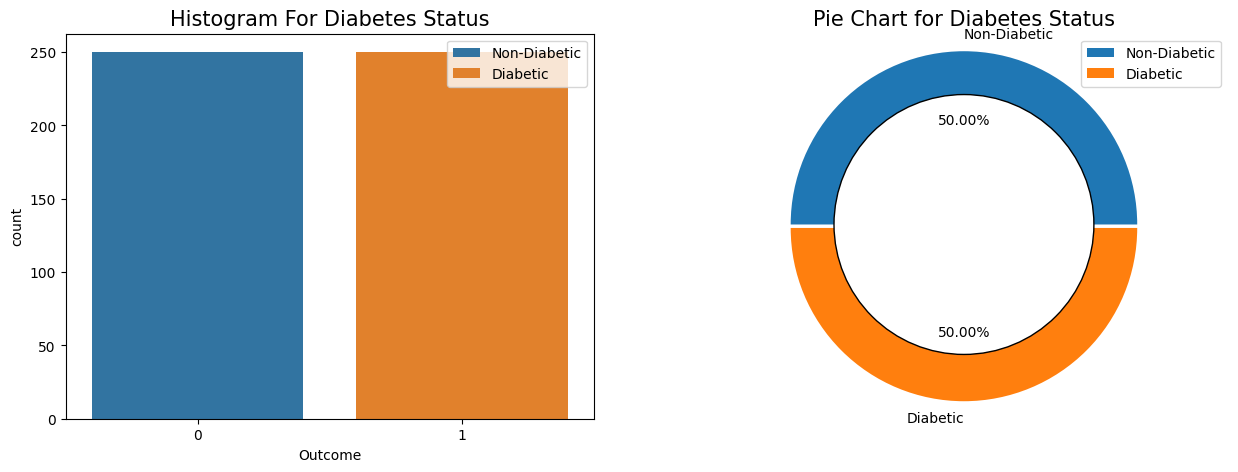

In [16]:
# Plotting For Diabetes Status
labels = ['Non-Diabetic', 'Diabetic']
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Outcome', hue='Outcome', alpha=1)
plt.legend(labels)
plt.title('Histogram For Diabetes Status', size=15)

plt.subplot(1, 2, 2)
y = data['Outcome'].value_counts()
explode = [0, 0.02]
plt.pie(y, labels=labels, explode=explode, autopct='%.2f%%')
plt.axis('equal')
plt.legend(labels)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='white', edgecolor='black')
plt.gca().add_artist(circle)
plt.title('Pie Chart for Diabetes Status', size=15)
plt.show()

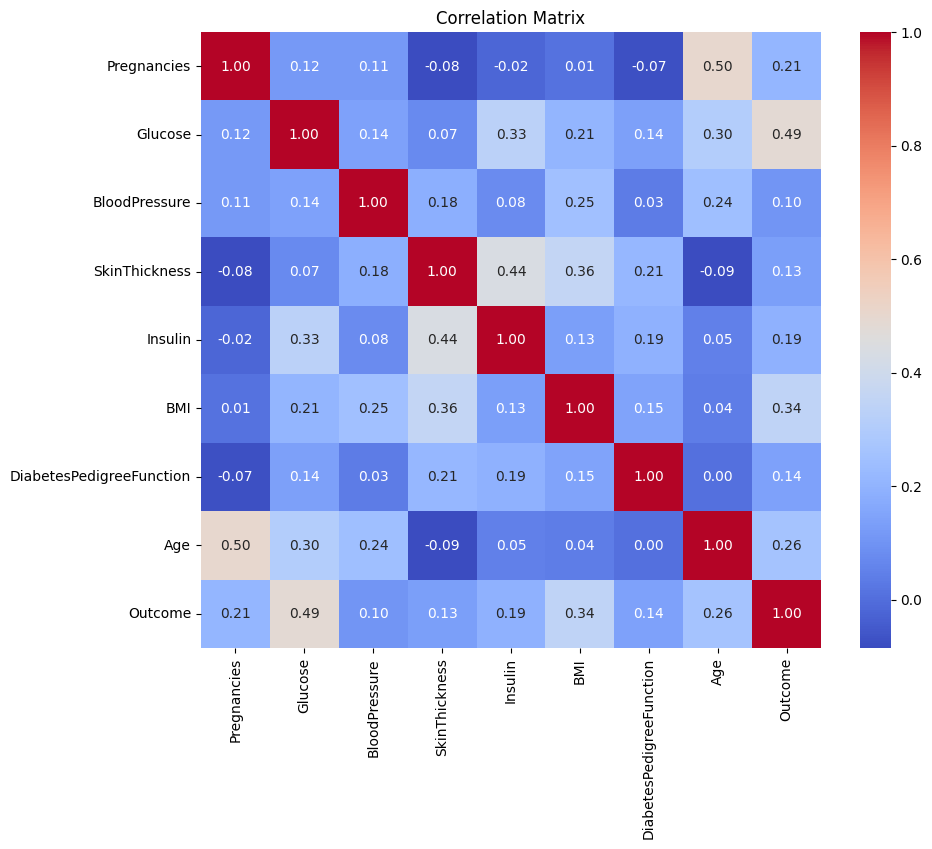

In [17]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Splitting Features and Target Variable
y = data['Outcome'] # Depended
x = data.drop('Outcome', axis=1) # independents

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
print('Length of Training Set :',len(x_train))
print('Length of Testing Set :',len(x_test))

Length of Training Set : 400
Length of Testing Set : 100


In [22]:
k_values = [i for i in range (1,40)]
scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_model, x, y, cv=10)
    scores.append(np.mean(score))

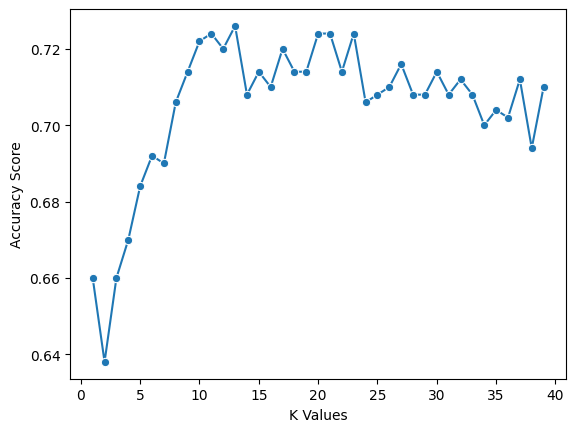

In [23]:
# Visualize K vs Accuracy
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

In [24]:
# instantiate the model with k=10
knn_11 = KNeighborsClassifier(n_neighbors=11)

# fit the model to the training set
knn_11.fit(x_train, y_train)

# predict on the test-set
y_pred_11 = knn_11.predict(x_test)

print('Model accuracy score with k=11 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_11)))

Model accuracy score with k=11 : 0.8000


In [25]:
# instantiate the model with k=13
knn_13 = KNeighborsClassifier(n_neighbors=13)

# fit the model to the training set
knn_13.fit(x_train, y_train)

# predict on the test-set
y_pred_13 = knn_13.predict(x_test)

print('Model accuracy score with k=13 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_13)))

Model accuracy score with k=13 : 0.8100


In [26]:
# instantiate the model with k=39
knn_39 = KNeighborsClassifier(n_neighbors=39)

# fit the model to the training set
knn_39.fit(x_train, y_train)

# predict on the test-set
y_pred_39 = knn_39.predict(x_test)

print('Model accuracy score with k=39 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_39)))

Model accuracy score with k=39 : 0.7700


In [27]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [28]:
y_pred = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.81

In [29]:
# Evaluate The Model
Training_score = accuracy_score(y_train, knn_model.predict(x_train))
Testing_score = accuracy_score(y_test, y_pred)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Classification Report
class_names = ['Non-Diabetic', 'Diabetic']
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

# Print the relevant metrics
print('Training Score (Accuracy):', Training_score)
print('Testing Score (Accuracy):', Testing_score)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

# Print detailed Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=class_names))

Training Score (Accuracy): 0.7675
Testing Score (Accuracy): 0.81
Precision: 0.7916666666666666
Recall: 0.8085106382978723
F1-Score: 0.8

Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.83      0.81      0.82        53
    Diabetic       0.79      0.81      0.80        47

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



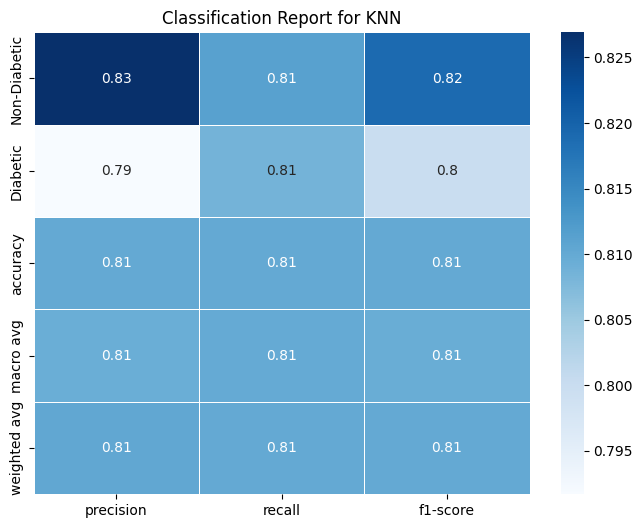

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', linewidths=.5)
plt.title('Classification Report for KNN')
plt.show()

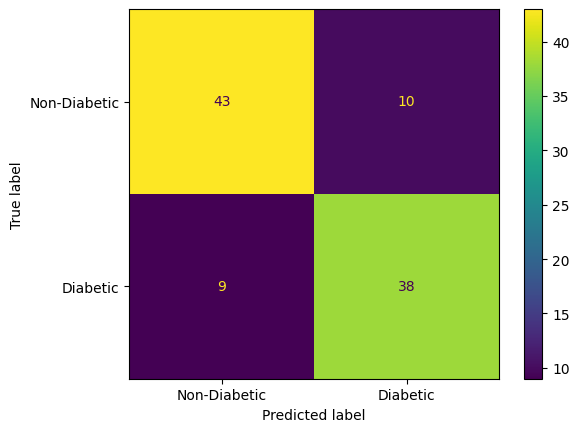

In [31]:
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Non-Diabetic", "Diabetic"])
cm_display.plot()
plt.show()